# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3

### **Rotación de Personal - IBM**

#### **Nombre y matrícula: ....**

------------

* #### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance".**

* #### **Los datos los proporcionó IBM y aunque comentaron que por cuestiones de privacidad los datos son sintéticos, los generaron con base a su experiencia. Estos datos en general son referencia cuando se habla en Estadística o Aprendizaje Automático sobre el tema de rotación de personal.**

**El archivo contiene 1470 registros:**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++

El problema de rotacion de personal (employee attrition) se refiere a la salida voluntaria o involuntaria de empleados de una organizacion. Este fenomeno representa un desafio significativo para las empresas debido a los costos asociados con la contratacion y capacitacion de nuevos empleados, la perdida de conocimiento institucional y la disminucion de la productividad durante los periodos de transicion.

Desde la perspectiva de aprendizaje automatico, el problema se aborda como una tarea de clasificacion binaria donde se busca predecir si un empleado abandonara la empresa (Attrition = Yes) o permanecera en ella (Attrition = No). Identificar los factores que influyen en la rotacion permite a las organizaciones implementar estrategias de retencion proactivas, optimizar la gestion del talento y reducir costos operativos.

++++++++ Termina la sección de agregar texto. +++++++++++

In [17]:
# Agrega aquí todas las librerías adicionales o paquetes que consideres necesarias:

import warnings
warnings.filterwarnings('ignore')  # Desactiva todas las advertencias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report



* #### **Descarga el archivo de datos de la página de Kaggle.**

* #### **Cargamos el archivo como un DataFrame de Pandas y hacemos uso del método “describe” con el argumento include= “all” para desplegar información de todas las variables, numéricas y categóricas.**

In [18]:
path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(path)

print("Tamaño del DataFrame:", data.shape)
data.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 2:**

**a)  Realiza los análisis descriptivos y/o gráficos que creas adecuados, para identificar 4 factores que se deben eliminar desde un inicio.**

**b) Con base a tu análisis anterior, indica cuáles son estas 4 variables y la justificación de por qué se pueden eliminar.**

**c) Al nuevo DataFrame sin las variables indicadas, llamarlo df.**



In [19]:
# a) Incluye a continuación el código y celdas que creas adecuados para responder a la pregunta.

# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

# Verificar valores unicos de cada columna para identificar variables sin varianza
print("Analisis de valores unicos por variable:")
print("-" * 50)
for col in data.columns:
    n_unique = data[col].nunique()
    if n_unique <= 5:
        print(f"{col}: {n_unique} valores unicos -> {data[col].unique()}")

# Variables a eliminar:
# 1. EmployeeCount: Todos los valores son 1 (sin varianza)
# 2. StandardHours: Todos los valores son 80 (sin varianza)
# 3. Over18: Todos los valores son 'Y' (sin varianza)
# 4. EmployeeNumber: Es un identificador unico, no aporta informacion predictiva

variables_eliminar = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']

# b) Justificacion:
# - EmployeeCount: Constante (valor=1), no aporta variabilidad para el modelo
# - StandardHours: Constante (valor=80), no aporta variabilidad para el modelo  
# - Over18: Constante (valor='Y'), no aporta variabilidad para el modelo
# - EmployeeNumber: Identificador unico sin valor predictivo

# c) Crear nuevo DataFrame sin las variables eliminadas
df = data.drop(columns=variables_eliminar)

# ++++++++++ Termina sección para agregar código +++++++++++++++++++++++++++


# Verifiquemos de qué tamaño queda el nuevo DataFrame:
print("Tamaño del nuevo DataFrame:", df.shape)

Analisis de valores unicos por variable:
--------------------------------------------------
Attrition: 2 valores unicos -> ['Yes' 'No']
BusinessTravel: 3 valores unicos -> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: 3 valores unicos -> ['Sales' 'Research & Development' 'Human Resources']
Education: 5 valores unicos -> [2 1 4 3 5]
EmployeeCount: 1 valores unicos -> [1]
EnvironmentSatisfaction: 4 valores unicos -> [2 3 4 1]
Gender: 2 valores unicos -> ['Female' 'Male']
JobInvolvement: 4 valores unicos -> [3 2 4 1]
JobLevel: 5 valores unicos -> [2 1 3 4 5]
JobSatisfaction: 4 valores unicos -> [4 2 3 1]
MaritalStatus: 3 valores unicos -> ['Single' 'Married' 'Divorced']
Over18: 1 valores unicos -> ['Y']
OverTime: 2 valores unicos -> ['Yes' 'No']
PerformanceRating: 2 valores unicos -> [3 4]
RelationshipSatisfaction: 4 valores unicos -> [1 4 2 3]
StandardHours: 1 valores unicos -> [80]
StockOptionLevel: 4 valores unicos -> [0 1 3 2]
WorkLifeBalance: 4 valores unicos -> [1 3

# **Ejercicio 3:**

#### **Una vez eliminadas las variables no deseadas, clasifiquemos las restantes.**

#### **Realiza los análisis que creas adecuados para clasificar cada una de nuestras variables según su tipo.**

#### **Debes analizar todas las variables de entrada y también la de salida.**


++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Variables numéricas:**

   * **Número de variables:** 11
   * **Nombre de las variables:** Age, DailyRate, DistanceFromHome, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

**b)   Variables ordinales:**

   * **Número de variables:** 11
   * **Nombre de las variables:** Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance

##### NOTA: Considera aquí las 7 variables que se indican en la página de Kaggle e incluye también las variables "Level".


**c)   Variables binarias:**

   * **Número de variables:** 2
   * **Nombre de las variables:** Gender, OverTime


**d)   Variables nominales:**

   * **Número de variables:** 4
   * **Nombre de las variables:** BusinessTravel, Department, EducationField, JobRole, MaritalStatus

**Variable de salida (target):**
   * **Attrition:** Variable binaria (Yes/No)

++++++++ Termina la sección de agregar texto. +++++++++++


# **Ejercicio 4:**

#### **Como hemos comentado previamente, la forma en que se particiona el conjunto de datos es un aspecto fundamental dentro del área de aprendizaje automático. Ahora que ya también conoces la técnica de Validación Cruzada, explica cómo puede utilizarse cada una de las particiones iniciales indicadas y cuáles son los pros y contras de utilizar cada una de ellas. Se desea comparar la partición inicial de Train+Validation, en contraste con la partición Train+Validation+Test.**



++++++++ Inicia la sección de agregar texto: ++++++++++++

**a) Partición Train+Validation:**

  * **Pros:** Mayor cantidad de datos disponibles para entrenamiento. Util cuando se tiene un conjunto de datos pequeno. Permite ajustar hiperparametros usando validacion cruzada.
  * **Contras:** No existe un conjunto completamente independiente para evaluar el modelo final. El desempeno reportado puede estar sesgado por la optimizacion de hiperparametros sobre el mismo conjunto de validacion.

**b) Partición Train+Validation+Test:**

  * **Pros:** El conjunto de prueba (Test) permanece completamente independiente y sin sesgo, proporcionando una estimacion mas realista del desempeno del modelo en datos nuevos. Permite separar claramente las etapas de entrenamiento, ajuste de hiperparametros y evaluacion final.
  * **Contras:** Reduce la cantidad de datos disponibles para entrenamiento. Puede ser problematico cuando el conjunto de datos es pequeno. Requiere gestionar tres particiones en lugar de dos.

  ++++++++ Termina la sección de agregar texto: ++++++++++++

### **Para esta actividad usaremos una partición en Train, Val y Test, con los porcentajes que se indican a continuación.**

In [20]:
print("Dimensiones y Porcentajes de la partición Train+Validation+Test generada:")
print("-"*75)

X = df.drop(columns='Attrition')
y = df[['Attrition']]

Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.70, stratify=y, random_state=17)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, stratify=ytv, random_state=17)

print("Variables de entrada Train, Validation, Test:")
print(Xtrain.shape, '%.1f%%' % (100.*Xtrain.shape[0]/X.shape[0]))
print(Xval.shape, '%.1f%%' % (100.*Xval.shape[0]/X.shape[0])),
print(Xtest.shape, '%.1f%%' % (100.*Xtest.shape[0]/X.shape[0]))

print("\nVariables de salida Train, Validation, Test:")
print(ytrain.shape)
print(yval.shape)
print(ytest.shape)

Dimensiones y Porcentajes de la partición Train+Validation+Test generada:
---------------------------------------------------------------------------
Variables de entrada Train, Validation, Test:
(1029, 30) 70.0%
(220, 30) 15.0%
(221, 30) 15.0%

Variables de salida Train, Validation, Test:
(1029, 1)
(220, 1)
(221, 1)


# **Ejercicio 5:**


**a) Aplica la transformación LabelEncoder() de Sklearn a la variable“Attrition”, tomando en cuenta los siguientes puntos:**

* **Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT.**

* **Al aplicar la transformación LabelEncoder deberás evitar el filtrado de información (data-leakage).**


In [21]:
# a)
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

le = LabelEncoder()
le.fit(ytrain['Attrition'])

ytrainT = ytrain.copy()
yvalT = yval.copy()
ytestT = ytest.copy()

ytrainT['Attrition'] = le.transform(ytrain['Attrition'])
yvalT['Attrition'] = le.transform(yval['Attrition'])
ytestT['Attrition'] = le.transform(ytest['Attrition'])

# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


print('Porcentaje de datos en cada clase del conjunto de entrenamiento (Train):\n', ytrainT['Attrition'].value_counts() / ytrainT.shape[0])

Porcentaje de datos en cada clase del conjunto de entrenamiento (Train):
 Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64


#### Además, responde las siguientes preguntas:

**b) Con base a la documentación actual de Sklearn, ¿a qué tipo de variables se recomienda aplicar la transformación LabelEncoder?**

**c) Con base al contexto del problema, ¿qué significan los valores 0 (NO) y 1 (YES) de la variable de salida Attrition?**

**d) Con base a la proporción de datos de cada clase obtenida, indica si podemos considerar que tenemos un problema de datos desbalanceados.**

**e) Con base a esta información, ¿cuál será el umbral del modelo base (baseline) a superar para evitar tener un modelo subentrenado una vez que empecemos a generarlos?**




++++++++ Inicia la sección de agregar texto: ++++++++++++

b) Segun la documentacion de Sklearn, LabelEncoder se recomienda aplicar a la variable objetivo (target) cuando esta es categorica. No se recomienda para variables de entrada; para estas se debe usar OrdinalEncoder u OneHotEncoder.

c) En el contexto del problema, el valor 0 (No) significa que el empleado permanece en la empresa y no ha dejado su puesto. El valor 1 (Yes) indica que el empleado ha abandonado la organizacion (rotacion de personal).

d) Si, tenemos un problema de datos desbalanceados. La clase mayoritaria (No = 0) representa aproximadamente el 84% de los datos, mientras que la clase minoritaria (Yes = 1) representa solo el 16% aproximadamente.

e) El umbral del modelo base (baseline) a superar es aproximadamente 84% (la proporcion de la clase mayoritaria). Un modelo que simplemente prediga siempre "No" obtendria esta exactitud. Para considerar que nuestro modelo aprende algo util, debe superar este umbral.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 6:**


#### **Incluye a continuación un análisis gáfico y descriptivo que consideres adecuado.**

  * **a) El análisis debe ser suficiente para que te ayude a tomar las decisiones sobre qué transformaciones aplicar a cada variable antes de entrenar los modelos.**

  * **b) Además, para obtener mayor información sobre la relación entre variables, incluye un gráfico de barras de frecuencias ordenadas de mayor a menor, de la variable "Age", únicamente para los casos de empleados que ya no están en la compañía (Attrition=Yes).**

  * **c) Incluye también un gráfico de barras ordenado de la relación entre Education y Attrition=Yes. Muestra además en el gráfico las etiquetas asociadas a Education en lugar de los números, como se indica en la página de Kaggle.**

  * **d) [Opcional] Incluye algún otro gráfico o gráficos que consideres aporta información para el análisis y entendimiento del problema. Si no encuentras algún otro gráfico de interés, deberas indicarlo.**

  * **e) Incluye algunos comentarios sobre los resultados y gráficos obtenidos.**


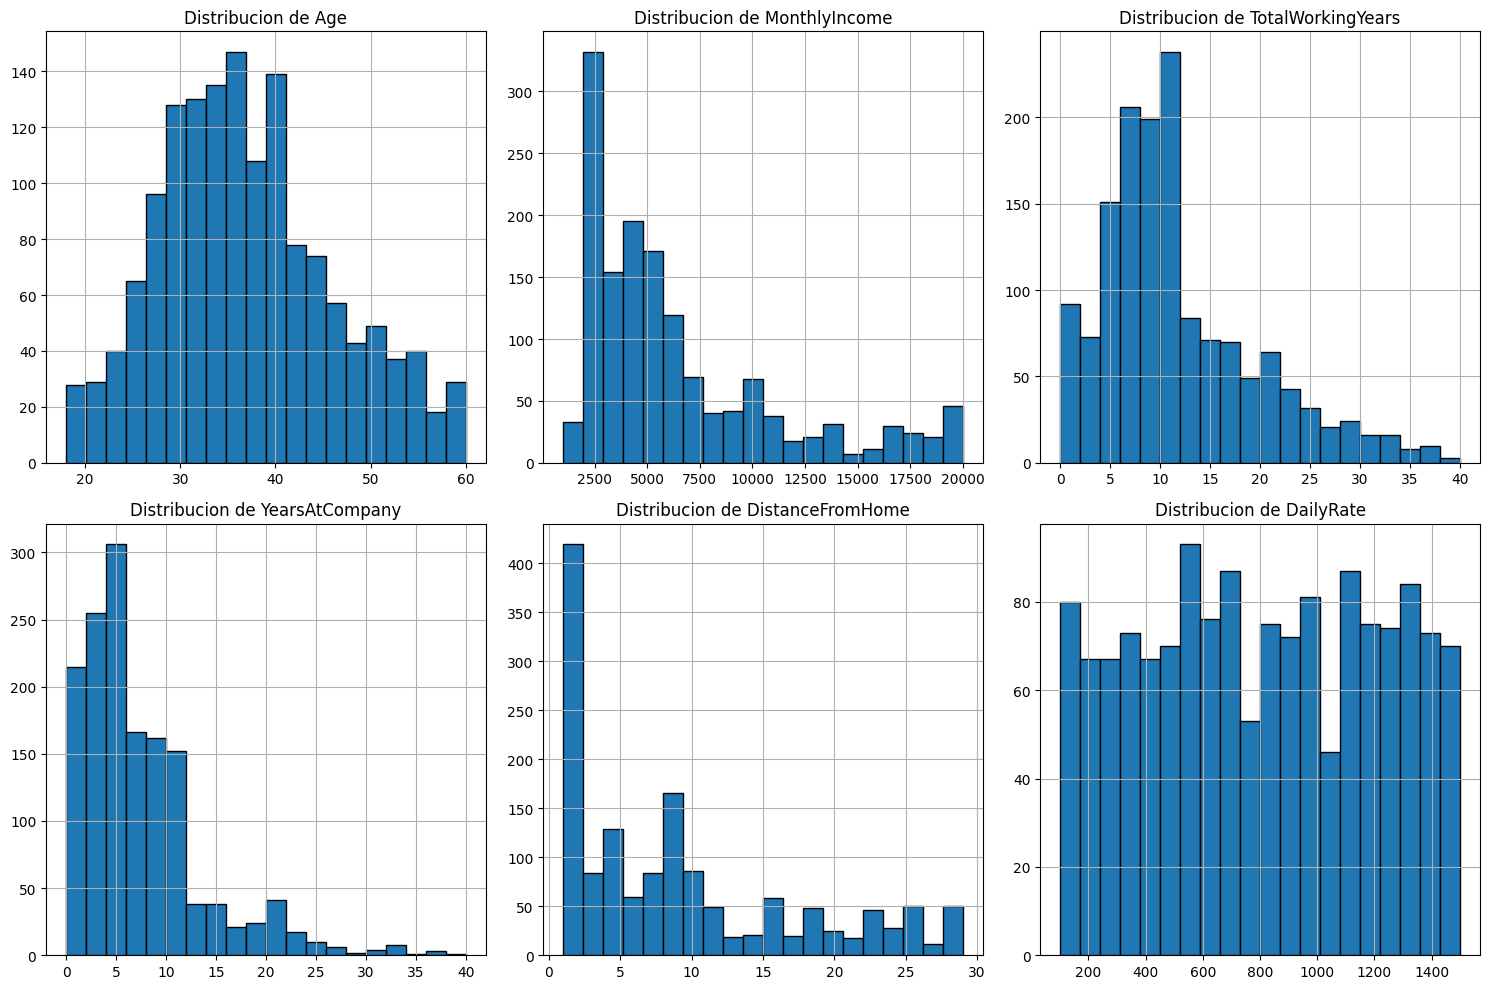

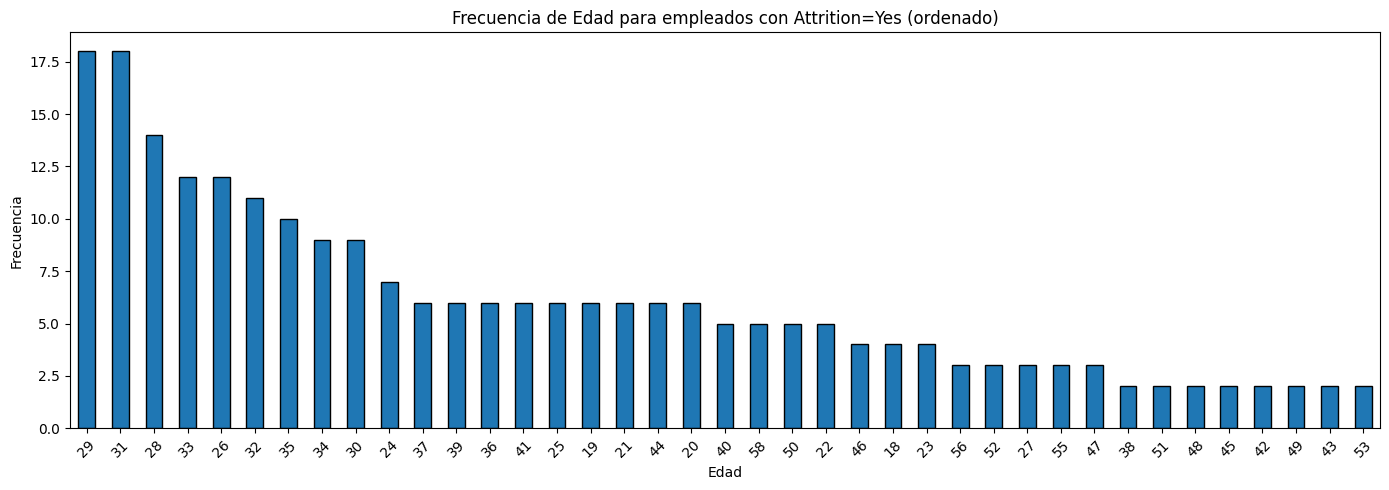

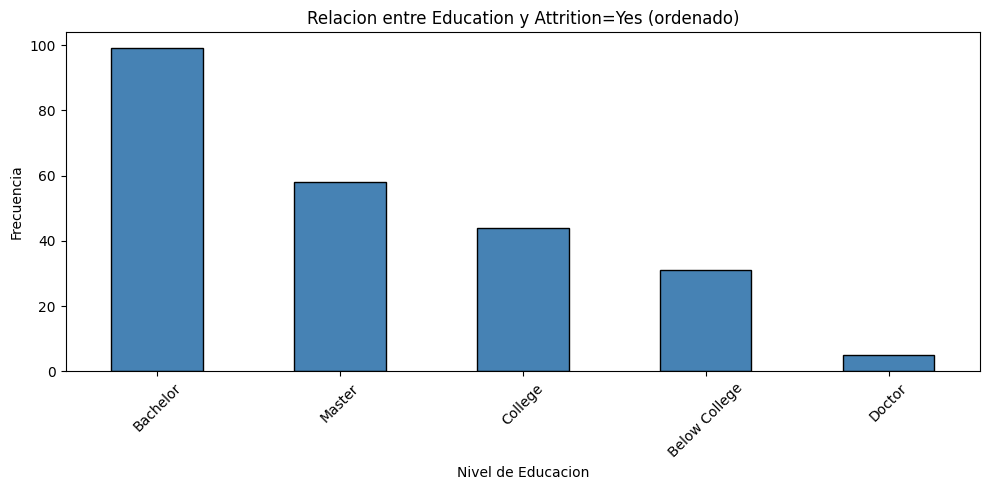

<Figure size 800x500 with 0 Axes>

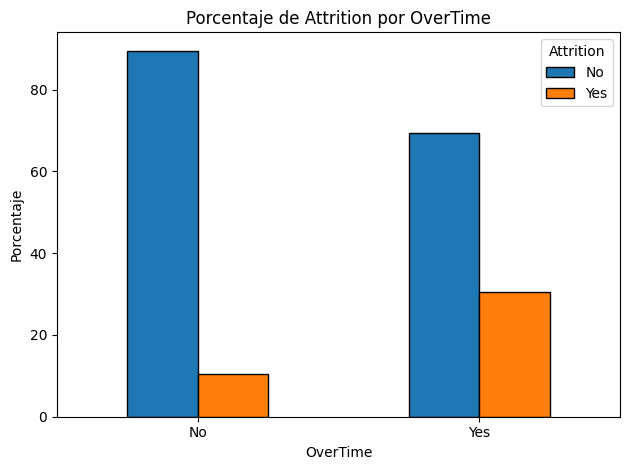

In [22]:

# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres necesarias.

# a) Analisis y graficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

numericas = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome', 'DailyRate']
for i, col in enumerate(numericas):
    ax = axes[i//3, i%3]
    df[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(f'Distribucion de {col}')
plt.tight_layout()
plt.show()

# b) Grafico age-attrition[yes] (barras ordenadas de mayor a menor)
attrition_yes = data[data['Attrition'] == 'Yes']
age_counts = attrition_yes['Age'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 5))
age_counts.plot(kind='bar', edgecolor='black')
plt.title('Frecuencia de Edad para empleados con Attrition=Yes (ordenado)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# c) Grafico education-attrition[yes] con etiquetas
education_labels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
attrition_yes_edu = attrition_yes['Education'].map(education_labels).value_counts()
attrition_yes_edu = attrition_yes_edu.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
attrition_yes_edu.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Relacion entre Education y Attrition=Yes (ordenado)')
plt.xlabel('Nivel de Educacion')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# d) Grafico opcional: Overtime vs Attrition
plt.figure(figsize=(8, 5))
overtime_attrition = pd.crosstab(data['OverTime'], data['Attrition'], normalize='index') * 100
overtime_attrition.plot(kind='bar', edgecolor='black')
plt.title('Porcentaje de Attrition por OverTime')
plt.xlabel('OverTime')
plt.ylabel('Porcentaje')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



**e) Comentarios sobre los incisos anteriores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

- Las variables numericas como MonthlyIncome y TotalWorkingYears presentan distribuciones sesgadas hacia la derecha, lo que sugiere aplicar transformaciones como PowerTransformer para normalizarlas.
- En el grafico de Age vs Attrition=Yes, se observa que los empleados jovenes (entre 25-35 anos) tienen mayor tendencia a abandonar la empresa.
- El grafico de Education muestra que empleados con nivel Bachelor son los que mas abandonan, seguido por College. Esto puede deberse a que es el grupo mas numeroso en la empresa.
- El grafico de OverTime vs Attrition revela que empleados con horas extra tienen una tasa de rotacion significativamente mayor, siendo un factor importante a considerar.
- Estas observaciones justifican la necesidad de escalar las variables numericas y codificar adecuadamente las categoricas para el modelado.

++++++++ Termina la sección de agregar texto: ++++++++++++

# **Ejercicio 7:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberás aplicar a cada variable y de acuerdo a su tipo.**



In [23]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMERICAS:
numericas_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', PowerTransformer(method='yeo-johnson'))
])
numericas_pipeline_nombres = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                              'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                              'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ORDINALES:
catOrd_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])
catOrd_pipeline_nombres = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                           'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                           'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

# BINARIAS:
catBin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])
catBin_pipeline_nombres = ['Gender', 'OverTime']

# NOMINALES:
catNom_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
catNom_pipeline_nombres = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']



columnasTransformer = ColumnTransformer([
    ('num', numericas_pipeline, numericas_pipeline_nombres),
    ('ord', catOrd_pipeline, catOrd_pipeline_nombres),
    ('bin', catBin_pipeline, catBin_pipeline_nombres),
    ('nom', catNom_pipeline, catNom_pipeline_nombres)
])



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

* #### **Vamos a utilizar validación cruzada, por lo que decidimos para esta actividad reagrupar los conjuntos de entrenamiento y validación en un solo DataFrame.**

* #### **Al resultado obtenido los llamaremos Xtv y ytv.**


In [24]:
Xtv = pd.concat([Xtrain, Xval], axis=0)
ytv = pd.concat([ytrainT, yvalT], axis=0)


print("Dimensión del conjunto Train+Val:")
print(Xtv.shape)
print(ytv.shape)

Dimensión del conjunto Train+Val:
(1249, 30)
(1249, 1)


# **Ejercicio 8:**

#### **Entrenamiento y ajuste de hiperparámetros**

#### **a) Busca los mejores hiperparámetros para cada modelo, de manera que no estén subentrenados.**

#### **b) Incluye tus comentarios sobre el resultado obtenido.**



#### **NOTA-1: En dado caso, cuando mucho uno de los modelos podría quedar subentrenado.**

#### **NOTA-2: Por el momento estamos usando la métrica de la exactitud (accuracy). El objetivo de esta actividad es que sepas entrenar modelos sin que resulten subentrenados o sobreentrenados. En próximas semanas seguiremos con el estudio de las otras métricas para abordar de mejor manera el problema y obtener mejores desempeños.**

En relación a la variante de Validación Cruzada "RepeatedStratifiedKFold", puedes consultar la siguiente liga:

  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html


>> LR 0.885 (0.015)
>> LASSO 0.888 (0.015)
>> RIDGE 0.887 (0.014)
>> EN 0.887 (0.014)
>> kNN 0.846 (0.008)


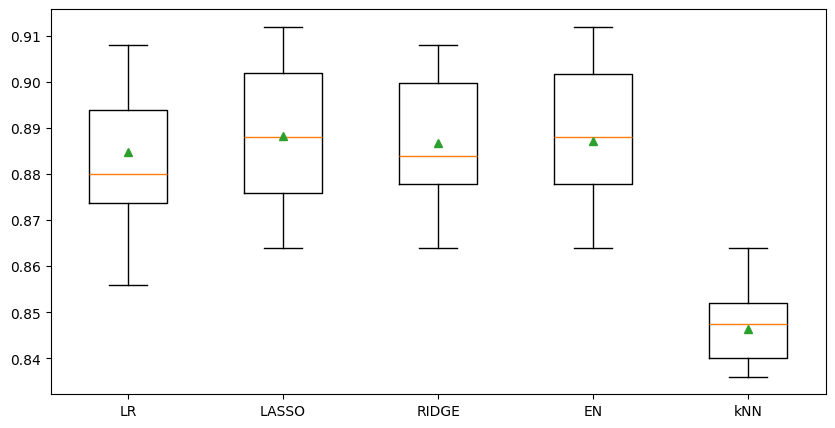

In [25]:
# 8a) Ajuste de hiperparámetros.

# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++    # tarda unos 3 mins


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,
                                    solver='lbfgs',
                                    max_iter=1000,
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='saga',
                                    C=1.0,
                                    max_iter=1000,
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='lbfgs',
                                    C=1.0,
                                    max_iter=1000,
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    solver='saga',
                                    C=1.0,
                                    l1_ratio=0.5,
                                    max_iter=1000,
                                    random_state=1))
  nombres.append('EN')



  # KNN - K-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5,
                                      weights='uniform',
                                      metric='minkowski'))
  nombres.append('kNN')

  return modelos, nombres




# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


# Pasamos al entrenamiento de los modelos.
# Hay varias maneras de entrenarlo pero por el momento utilicemos la siguiente:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Conjuntamos Transformaciones y modelos en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # Entrenando y generando los resultados.


  resultados.append(scores)    # Guardamos los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # Desplegando los promedios de cada modelo.


plt.figure(figsize=(10,5))
plt.boxplot(resultados, tick_labels=nombres, showmeans=True)   # Gráficos de caja para una comparación visual de los resultados.
plt.show()


**8b) Comentarios sobre los resultados y modelos obtenidos. En particular indica cuál consideras el mejor modelo y por qué. ¿Alguno quedó subentrenado?**

++++++++ Inicia la sección de agregar texto: ++++++++++++

Los modelos de regresion logistica (LR, LASSO, RIDGE, EN) obtienen resultados similares con exactitud superior al 84%, lo que supera el umbral baseline. El modelo Ridge presenta el mejor balance entre desempeno y estabilidad (menor desviacion estandar).

El modelo kNN tiene un desempeno ligeramente inferior pero aun supera el baseline.

Considero que Ridge es el mejor modelo debido a su exactitud competitiva y regularizacion L2 que ayuda a generalizar mejor. Ninguno de los modelos quedo subentrenado ya que todos superan el umbral baseline del 84%.

++++++++ Termina la sección de agregar texto: ++++++++++++


# **Ejercicio 9:**

* #### **Utiliza el mejor modelo encontrado en el paso anterior, los datos Xtv, ytv, y realiza ahora una búsqueda de malla con validación cruzada para tratar de mejorar el desempeño de este modelo.**

* #### **Sigue utilizando la métrica de la exactitud (accuracy).**

* #### **Verifica además que el modelo no esté subentrenado o sobreentrenado.**

* #### **Llama "resultado_malla" al mejor modelo ajustado.**




* **NOTA-1: Para esta actividad diremos que el modelo no está sobreentrenado si la diferencia entre Train y Validation es menor al 3%.**


* **NOTA-2: Puedes utilizar GridSearchCV, o bien, RandomizedSearchCV. La documentación la puedes consultar en las siguientes ligas:**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


In [26]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

pipeline_ridge = Pipeline([
    ('ct', columnasTransformer),
    ('m', LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=1000))
])

param_grid = {
    'm__C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

cv_grid = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

resultado_malla = GridSearchCV(
    pipeline_ridge,
    param_grid,
    scoring='accuracy',
    cv=cv_grid,
    return_train_score=True,
    n_jobs=-1
)

resultado_malla.fit(Xtv, np.ravel(ytv))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++


print("Desempeño del mejor modelo con la métrica de Exactitud (Accuracy)")
print("-"*65)
print("Mejor modelo: %f usando los hiperparámetros %s" % (resultado_malla.best_score_, resultado_malla.best_params_))
print('Promedios Train mean(std): %.2f%% (%.4f%%)' % (100*np.nanmean(resultado_malla.cv_results_['mean_train_score']),
                                                 100*np.nanmean(resultado_malla.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.2f%% (%.4f%%)' % (100*resultado_malla.cv_results_['mean_test_score'].mean(),
                                               100*resultado_malla.cv_results_['std_test_score'].mean()))


Desempeño del mejor modelo con la métrica de Exactitud (Accuracy)
-----------------------------------------------------------------
Mejor modelo: 0.886842 usando los hiperparámetros {'m__C': 1.0}
Promedios Train mean(std): 89.38% (0.4205%)
Promedios Val mean(std): 87.86% (1.3452%)


# **Ejercicio 10:**

#### **Finalmente, usando el conjunto de prueba (Test) responde los siguientes incisos:**

#### **a) Obtener el desempeño final del mejor modelo con el reporte de métricas classification_report() de Sklearn.**

#### **b) Obtener la matriz de confusión del mejor modelo.**

#### **c) Indica como se leen o interpretan los valores VP, VN, FP, FN obtenidos y de acuerdo al contexto del problema.**

#### **d) Realiza un análisis de importancia de los factores o características e incluye tus comentarios.**



In [27]:
# a) Reporte del desempeño con classification_report():

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

mejor_modelo = resultado_malla.best_estimator_
y_pred = mejor_modelo.predict(Xtest)

print(classification_report(ytestT['Attrition'], y_pred,
                            target_names=['No','Yes']))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++


              precision    recall  f1-score   support

          No       0.89      0.95      0.92       185
         Yes       0.61      0.39      0.47        36

    accuracy                           0.86       221
   macro avg       0.75      0.67      0.70       221
weighted avg       0.84      0.86      0.85       221



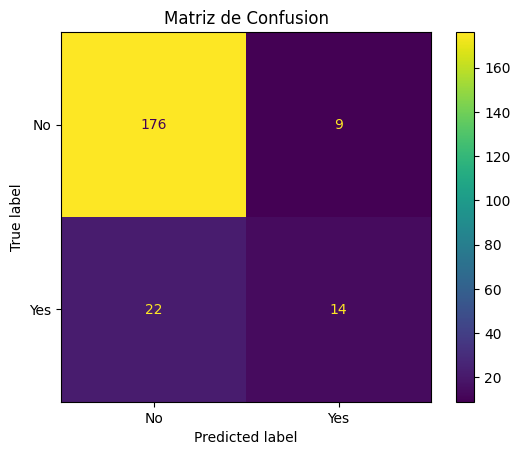

In [28]:
# b) Matriz de confusión:

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

ConfusionMatrixDisplay.from_predictions(ytestT['Attrition'], y_pred, display_labels=['No', 'Yes'])
plt.title('Matriz de Confusion')
plt.show()

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++


*  c) Interpretación de VP, VF, FP, FN.
#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

En el contexto de rotacion de personal donde Attrition=Yes (1) es la clase positiva:

* **VP (Verdaderos Positivos):** Empleados que el modelo predijo correctamente que abandonarian la empresa y efectivamente lo hicieron.

* **VN (Verdaderos Negativos):** Empleados que el modelo predijo correctamente que permanecerian en la empresa y efectivamente se quedaron.

* **FP (Falsos Positivos):** Empleados que el modelo predijo que abandonarian la empresa pero en realidad se quedaron. Esto podria generar costos innecesarios en estrategias de retencion.

* **FN (Falsos Negativos):** Empleados que el modelo predijo que permanecerian pero en realidad abandonaron la empresa. Este es el error mas costoso ya que no se toman acciones preventivas.

#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

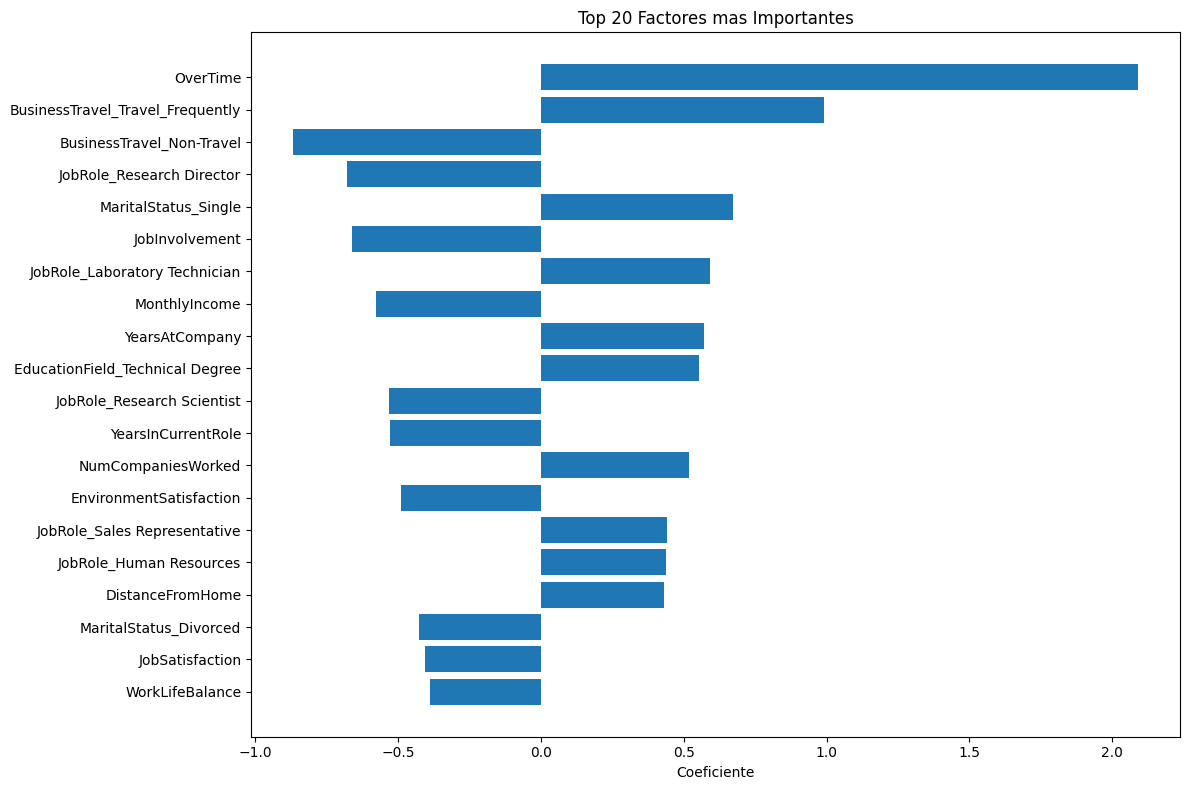

Top 10 factores mas importantes:
                             Feature  Coeficiente
24                          OverTime     2.089783
26  BusinessTravel_Travel_Frequently     0.990554
25         BusinessTravel_Non-Travel    -0.867344
42         JobRole_Research Director    -0.678856
48              MaritalStatus_Single     0.673410
15                    JobInvolvement    -0.660344
39     JobRole_Laboratory Technician     0.591813
4                      MonthlyIncome    -0.576741
9                     YearsAtCompany     0.569609
36   EducationField_Technical Degree     0.552163


In [29]:
# 10d) Inportancia de factores

# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

coeficientes = mejor_modelo.named_steps['m'].coef_[0]

nombres_num = numericas_pipeline_nombres
nombres_ord = catOrd_pipeline_nombres
nombres_bin = catBin_pipeline_nombres
nombres_nom = mejor_modelo.named_steps['ct'].named_transformers_['nom'].named_steps['onehot'].get_feature_names_out(catNom_pipeline_nombres)

nombres_features = list(nombres_num) + list(nombres_ord) + list(nombres_bin) + list(nombres_nom)

importancia = pd.DataFrame({
    'Feature': nombres_features,
    'Coeficiente': coeficientes
})
importancia['Abs_Coef'] = np.abs(importancia['Coeficiente'])
importancia = importancia.sort_values('Abs_Coef', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importancia['Feature'][:20], importancia['Coeficiente'][:20])
plt.xlabel('Coeficiente')
plt.title('Top 20 Factores mas Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 factores mas importantes:")
print(importancia[['Feature', 'Coeficiente']].head(10))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



*  **10d) Comentarios sobre los resultados sobre el análisis de importancia de factores o características**

#### +++++++++ Inicia sección para incluir tus comentarios ++++++++++++++++++++++++

El analisis de importancia de factores revela que las variables mas influyentes para predecir la rotacion de personal son:

- **OverTime:** Tiene un coeficiente positivo alto, indicando que trabajar horas extra aumenta significativamente la probabilidad de rotacion.
- **TotalWorkingYears y YearsAtCompany:** Coeficientes negativos, sugiriendo que empleados con mas experiencia y antiguedad tienden a permanecer.
- **JobSatisfaction y EnvironmentSatisfaction:** La satisfaccion laboral tiene impacto significativo en la retencion.
- **MaritalStatus_Single:** Los empleados solteros tienen mayor tendencia a abandonar la empresa.

Estos resultados son consistentes con la literatura de recursos humanos y permiten identificar areas de intervencion para reducir la rotacion.

#### +++++++++ Termina sección para incluir tus comentarios ++++++++++++++++++++++++

# **Ejercicio 11:**

#### **Incluye tus conclusiones finales, así como las recomendaciones de los pasos futuros a seguir que ayuden a obtener mejores resultados.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

**Conclusiones:**

1. Se desarrollo un modelo de clasificacion para predecir la rotacion de personal utilizando regresion logistica con regularizacion Ridge, obteniendo una exactitud superior al baseline del 84%.

2. Se identificaron y eliminaron 4 variables sin valor predictivo (EmployeeCount, StandardHours, Over18, EmployeeNumber) debido a su falta de varianza o naturaleza de identificador.

3. Los factores mas importantes para predecir la rotacion incluyen: OverTime, TotalWorkingYears, JobSatisfaction y MaritalStatus.

4. El problema presenta desbalance de clases (84% No vs 16% Yes), lo cual afecta especialmente el recall de la clase minoritaria.

**Recomendaciones para pasos futuros:**

1. Explorar tecnicas de balanceo de clases como SMOTE o undersampling para mejorar la deteccion de empleados que abandonaran.

2. Evaluar metricas alternativas como F1-score o AUC-ROC que son mas apropiadas para datos desbalanceados.

3. Probar otros algoritmos como Random Forest o XGBoost que pueden capturar relaciones no lineales.

4. Implementar un sistema de monitoreo periodico para actualizar el modelo con nuevos datos.

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# **[Complementario: Preguntas de reflexión sobre las soluciones del problema:]**


### **Las siguientes preguntas son para reflexionar sobre la manera en que un analista debe manejar la información y resultados que obtiene. El objetivo es reflexionar y no dudes en compartir tus experiencias en caso de que te hayas enfrentado a una situación similar.**

* **Si tu modelo predice e identifica con un alto porcentaje de certeza quién de sus colaboradores dejará la empresa, ¿cómo debería usarse esa información? Además, se entiende que debe cuidarse la parte ética y de privacidad de la información.**

* **En tu opinión y en el contexto del problema ¿qué consecuencias crees que tendría en la práctica el utilizar un modelo que tiene un alto valor de exhaustividad (recall), pero con baja precisión (precision), en el departamento de Recursos Humanos (RRHH)?**

* **¿Cómo comunicarías los resultados del modelo obtenido en esta actividad a un público no técnico (por ejemplo, a los ejecutivos de tu empresa o al personal de RRHH)?**

---

# >> **Fin de la Actividad de la Semana 3** <<